In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import os
import shutil
import random
from pathlib import Path
import numpy as np
n_folds = 10
batch_size=8
input_shape=[200,200,3]

In [2]:
# Set up the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,)


# Set up the KFold cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [3]:
# Model definition
def create_cnn_model():
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation ='relu', input_shape=[200,200,3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation ='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.30))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.30))

    cnn.add(tf.keras.layers.Flatten())
   
    cnn.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

    cnn.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])

    return cnn

cnn = create_cnn_model()

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold1
Epoch 1/8
62/62 [==============================] - 26s 398ms/step - loss: 0.1636 - accuracy: 0.5833 - val_loss: 0.1410 - val_accuracy: 0.7818
Epoch 2/8
62/62 [==============================] - 24s 387ms/step - loss: 0.1423 - accuracy: 0.7175 - val_loss: 0.1281 - val_accuracy: 0.8000
Epoch 3/8
62/62 [==============================] - 24s 388ms/step - loss: 0.1311 - accuracy: 0.7398 - val_loss: 0.1157 - val_accuracy: 0.8000
Epoch 4/8
62/62 [==============================] - 24s 387ms/step - loss: 0.1234 - accuracy: 0.7642 - val_loss: 0.1190 - val_accuracy: 0.7818
Epoch 5/8
62/62 [==============================] - 25s 404ms/step - loss: 0.1126 - accuracy: 0.8069 - val_loss: 0.1156 - val_accuracy: 0.8182
Epoch 6/8
62/62 [==============================] - 26s 411ms/step - loss: 0.1090 - accuracy: 0.8049 - val_loss: 0.1119 - val_accuracy: 0.8000
Epoch 7/8
62/62 [==============================] -

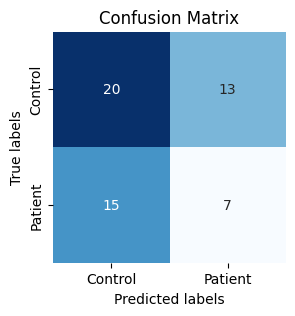

7/7 [==============================] - 0s 62ms/step - loss: 0.1285 - accuracy: 0.7818
Fold 1 Test Loss: 0.12847912311553955, Test Accuracy: 0.7818182110786438
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold2
Epoch 1/8
62/62 [==============================] - 26s 426ms/step - loss: 0.0917 - accuracy: 0.8455 - val_loss: 0.1105 - val_accuracy: 0.8000
Epoch 2/8
62/62 [==============================] - 28s 446ms/step - loss: 0.0845 - accuracy: 0.8780 - val_loss: 0.1098 - val_accuracy: 0.8000
Epoch 3/8
62/62 [==============================] - 28s 444ms/step - loss: 0.0814 - accuracy: 0.8760 - val_loss: 0.1208 - val_accuracy: 0.7273
Epoch 4/8
62/62 [==============================] - 28s 454ms/step - loss: 0.0763 - accuracy: 0.8882 - val_loss: 0.1259 - val_accuracy: 0.7455
Epoch 5/8
62/62 [==============================] - 28s 450ms/step - loss: 0.0693 - accuracy: 0.9024 - val_loss: 0.1288 - val_accuracy: 0.7636
Epoch 6/8
62/62 [================

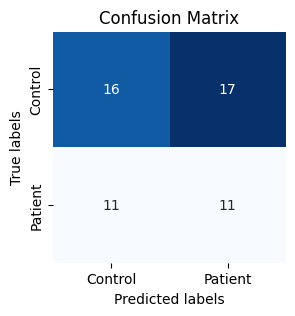

7/7 [==============================] - 1s 67ms/step - loss: 0.2055 - accuracy: 0.7091
Fold 2 Test Loss: 0.20550702512264252, Test Accuracy: 0.7090908885002136
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold3
Epoch 1/8
62/62 [==============================] - 28s 452ms/step - loss: 0.0730 - accuracy: 0.8841 - val_loss: 0.0413 - val_accuracy: 0.9818
Epoch 2/8
62/62 [==============================] - 26s 424ms/step - loss: 0.0526 - accuracy: 0.9085 - val_loss: 0.0407 - val_accuracy: 0.9818
Epoch 3/8
62/62 [==============================] - 27s 435ms/step - loss: 0.0444 - accuracy: 0.9350 - val_loss: 0.0336 - val_accuracy: 0.9818
Epoch 4/8
62/62 [==============================] - 27s 440ms/step - loss: 0.0415 - accuracy: 0.9553 - val_loss: 0.0397 - val_accuracy: 0.9455
Epoch 5/8
62/62 [==============================] - 26s 426ms/step - loss: 0.0370 - accuracy: 0.9533 - val_loss: 0.0355 - val_accuracy: 0.9636
Epoch 6/8
62/62 [================

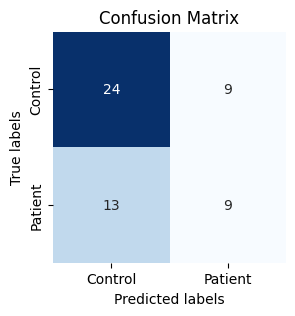

7/7 [==============================] - 1s 64ms/step - loss: 0.0487 - accuracy: 0.9273
Fold 3 Test Loss: 0.048729825764894485, Test Accuracy: 0.9272727370262146
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold4
Epoch 1/8
62/62 [==============================] - 27s 431ms/step - loss: 0.0294 - accuracy: 0.9593 - val_loss: 0.0217 - val_accuracy: 0.9818
Epoch 2/8
62/62 [==============================] - 27s 437ms/step - loss: 0.0200 - accuracy: 0.9756 - val_loss: 0.0183 - val_accuracy: 0.9818
Epoch 3/8
62/62 [==============================] - 27s 437ms/step - loss: 0.0195 - accuracy: 0.9817 - val_loss: 0.0205 - val_accuracy: 0.9818
Epoch 4/8
62/62 [==============================] - 26s 420ms/step - loss: 0.0191 - accuracy: 0.9756 - val_loss: 0.0258 - val_accuracy: 0.9273
Epoch 5/8
62/62 [==============================] - 26s 419ms/step - loss: 0.0153 - accuracy: 0.9837 - val_loss: 0.0232 - val_accuracy: 0.9455
Epoch 6/8
62/62 [===============

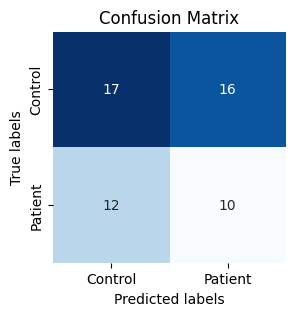

7/7 [==============================] - 1s 63ms/step - loss: 0.0376 - accuracy: 0.9273
Fold 4 Test Loss: 0.03758835047483444, Test Accuracy: 0.9272727370262146
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold5
Epoch 1/8
62/62 [==============================] - 26s 413ms/step - loss: 0.0298 - accuracy: 0.9553 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 26s 416ms/step - loss: 0.0156 - accuracy: 0.9817 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 27s 430ms/step - loss: 0.0120 - accuracy: 0.9837 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 28s 459ms/step - loss: 0.0116 - accuracy: 0.9878 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 30s 491ms/step - loss: 0.0080 - accuracy: 0.9878 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/8
62/62 [================

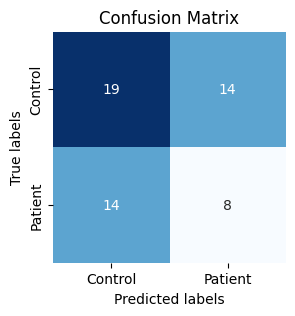

7/7 [==============================] - 1s 72ms/step - loss: 0.0106 - accuracy: 1.0000
Fold 5 Test Loss: 0.010634263977408409, Test Accuracy: 1.0
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold6
Epoch 1/8
62/62 [==============================] - 32s 516ms/step - loss: 0.0056 - accuracy: 0.9959 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 32s 519ms/step - loss: 0.0068 - accuracy: 0.9898 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 32s 516ms/step - loss: 0.0043 - accuracy: 0.9898 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 33s 533ms/step - loss: 0.0087 - accuracy: 0.9878 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 32s 520ms/step - loss: 0.0184 - accuracy: 0.9756 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/8
62/62 [==============================

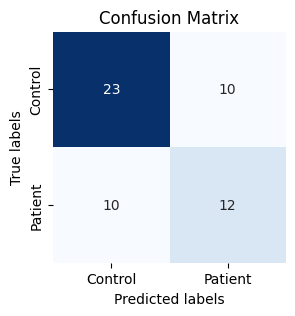

7/7 [==============================] - 1s 68ms/step - loss: 0.0016 - accuracy: 1.0000
Fold 6 Test Loss: 0.0015513618709519506, Test Accuracy: 1.0
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold7
Epoch 1/8
62/62 [==============================] - 30s 488ms/step - loss: 0.0051 - accuracy: 0.9939 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 29s 464ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 7.0023e-04 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 30s 478ms/step - loss: 0.0022 - accuracy: 0.9980 - val_loss: 7.2797e-04 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 29s 469ms/step - loss: 0.0037 - accuracy: 0.9959 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 29s 460ms/step - loss: 0.0035 - accuracy: 0.9959 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/8
62/62 [=====================

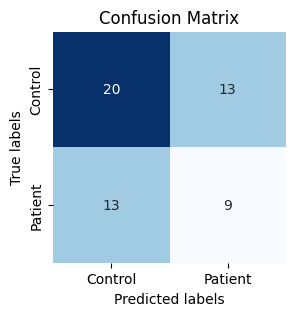

7/7 [==============================] - 1s 73ms/step - loss: 0.0015 - accuracy: 1.0000
Fold 7 Test Loss: 0.0015364603605121374, Test Accuracy: 1.0
Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold8
Epoch 1/8
62/62 [==============================] - 30s 479ms/step - loss: 0.0029 - accuracy: 0.9959 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 29s 463ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 28s 454ms/step - loss: 0.0018 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 29s 464ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 28s 457ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/8
62/62 [=============================

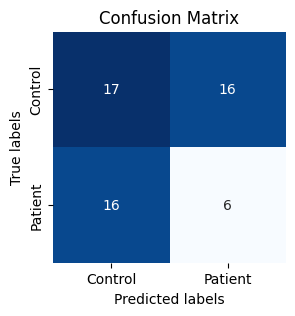

7/7 [==============================] - 1s 74ms/step - loss: 9.9807e-04 - accuracy: 1.0000
Fold 8 Test Loss: 0.0009980694158002734, Test Accuracy: 1.0
Found 493 images belonging to 2 classes.
Found 54 images belonging to 2 classes.
Training : fold9
Epoch 1/8
62/62 [==============================] - 28s 455ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.9865e-04 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 28s 458ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.0634e-04 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 34s 548ms/step - loss: 0.0041 - accuracy: 0.9939 - val_loss: 2.2827e-04 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 29s 462ms/step - loss: 0.0042 - accuracy: 0.9939 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 30s 476ms/step - loss: 0.0031 - accuracy: 0.9959 - val_loss: 6.1502e-04 - val_accuracy: 1.0000
Epoch 6/8
62/62 [=========

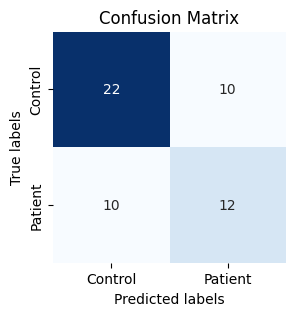

7/7 [==============================] - 1s 79ms/step - loss: 0.0025 - accuracy: 1.0000
Fold 9 Test Loss: 0.002513232873752713, Test Accuracy: 1.0
Found 494 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Training : fold10
Epoch 1/8
62/62 [==============================] - 31s 501ms/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 4.1921e-04 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 32s 514ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.6037e-04 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 32s 517ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.1822e-04 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 32s 518ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.7803e-04 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 32s 521ms/step - loss: 9.3752e-04 - accuracy: 1.0000 - val_loss: 1.7181e-04 - val_accuracy: 1.0000
Epoch 6/8
62/62 [=====

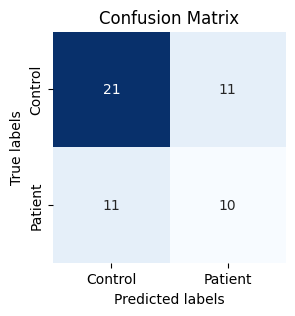

7/7 [==============================] - 1s 72ms/step - loss: 0.0022 - accuracy: 1.0000
Fold 10 Test Loss: 0.002176302019506693, Test Accuracy: 1.0


In [4]:
# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kfold.split(np.arange(n_folds))):

     # Load the data for this fold

    train_data = train_datagen.flow_from_directory(f'folds/fold_{fold+1}/train', 
                                                   target_size=(200, 200), 
                                                   batch_size=batch_size, 
                                                   class_mode='binary')
    test_data = train_datagen.flow_from_directory(f'folds/fold_{fold+1}/test', 
                                                 target_size=(200, 200), 
                                                 batch_size=batch_size, 
                                                 class_mode='binary')
    
    # Train the model for this fold
    print(f'Training : fold{fold+1}')
    history = cnn.fit(train_data, epochs=8, validation_data=test_data)

    ##Confusion Matrix Generator 
    y_pred_real = cnn.predict(test_data)
    y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
    y_true = test_data.classes
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(test_data.classes, y_pred)
    class_names = test_data.class_indices.keys()
    import seaborn as sns
    # Plot the confusion matrix as an image
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

    #Evaluate the model on the test data for this fold
    test_loss, test_acc = cnn.evaluate(test_data)
    print(f'Fold {fold+1} Test Loss: {test_loss}, Test Accuracy: {test_acc}')

In [10]:
##Trying other loss function 
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted\Dataset",
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted\Dataset", # same directory as training data
    target_size=(200, 200),
    batch_size=1,
    class_mode='binary',
    subset='validation') # set as validation data

Found 439 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


108/108 [==============================] - 2s 14ms/step


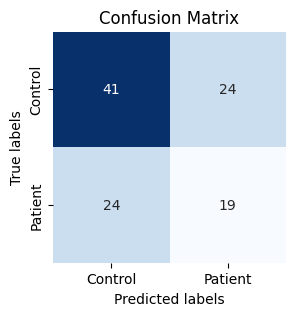

In [16]:
##Confusion Matrix Generator and ROC Curve
y_pred = cnn.predict(validation_generator)
y_pred = [int(p >= 0.5) for p in y_pred] ##With sigmoid 1 neuron
    
y_true = test_data.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
class_names = validation_generator.class_indices.keys()
import seaborn as sns
# Plot the confusion matrix as an image
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
